# Data Prepration

## Importing Dependences

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples

import warnings
warnings.filterwarnings("ignore")


## Load Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')

## Data Exploration

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

## Data Cleaning

In [7]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Check for Duplicates
df.duplicated().sum()

0

## Data Preprocessing

In [9]:
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})
df = df.drop('CustomerID', axis=1)

df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [11]:
# df['Gender'].value_counts()
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
print(df.head())

   Gender  Age  Annual Income  Spending Score
0       1   19             15              39
1       1   21             15              81
2       0   20             16               6
3       0   23             16              77
4       0   31             17              40


## EDA

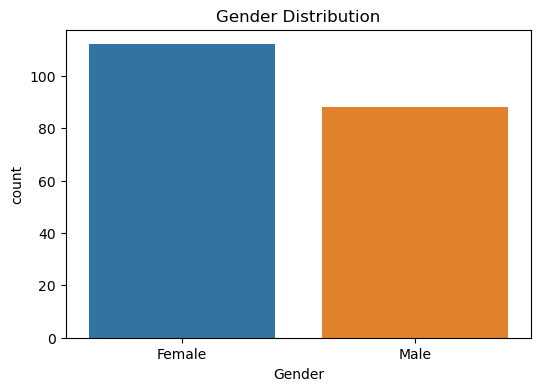

In [13]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

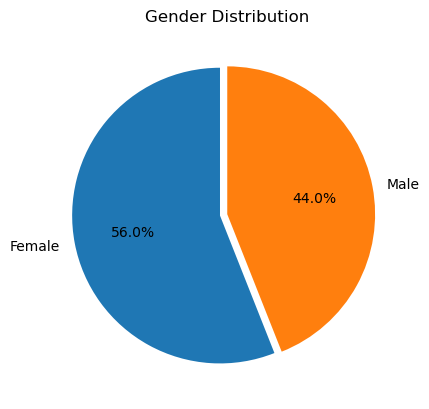

In [14]:
# pie chart for gender distribution
values = df['Gender'].value_counts().sort_index()
labels = ['Female', 'Male']
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0.05, 0))
plt.title('Gender Distribution')
plt.show()

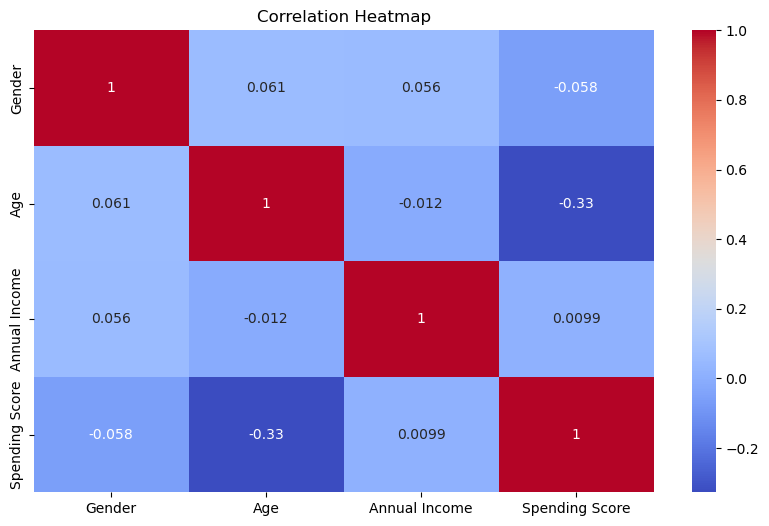

In [15]:
# Heatmap for Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

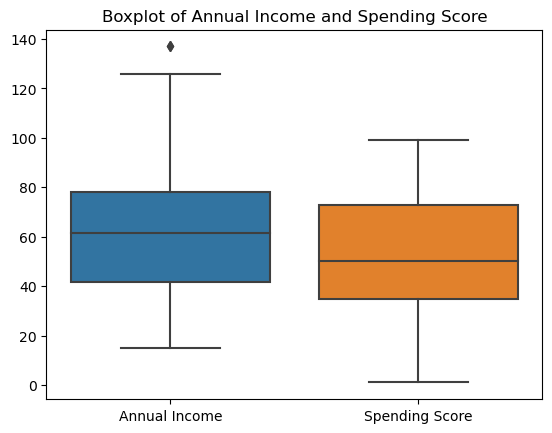

In [16]:
# Boxplot for Annual Income, Spending Score
sns.boxplot(data=df[['Annual Income', 'Spending Score']])
plt.title('Boxplot of Annual Income and Spending Score')
plt.show()

## Feature Scaling

In [17]:
scaler = StandardScaler()
features = ['Annual Income', 'Spending Score']
X_scaled = scaler.fit_transform(df[features])

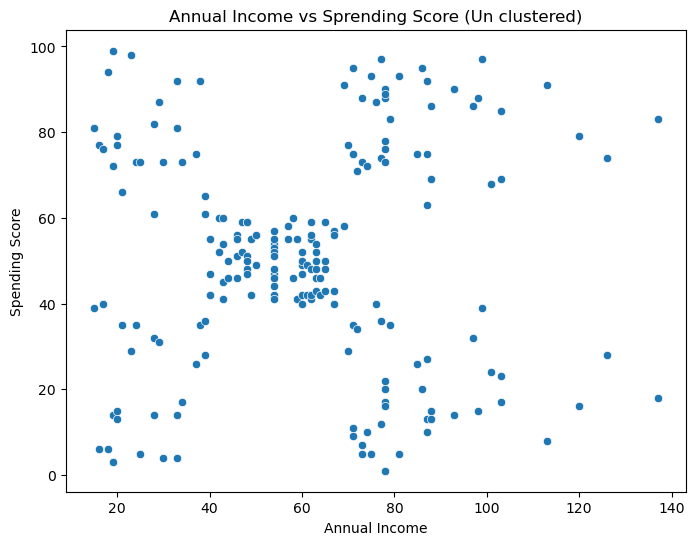

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income', y='Spending Score', data=df)
plt.title('Annual Income vs Sprending Score (Un clustered)')
plt.show()

# Modeling

## Apply KMeans

In [25]:
# finding optimal number of clusters using Elbow Method
wcss = [] # Within-Cluster Sum of Squares
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

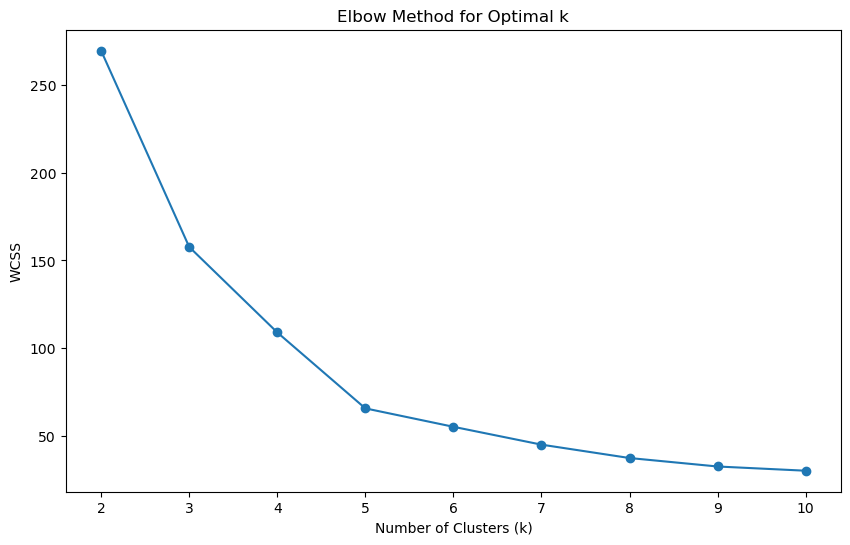

In [26]:
# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

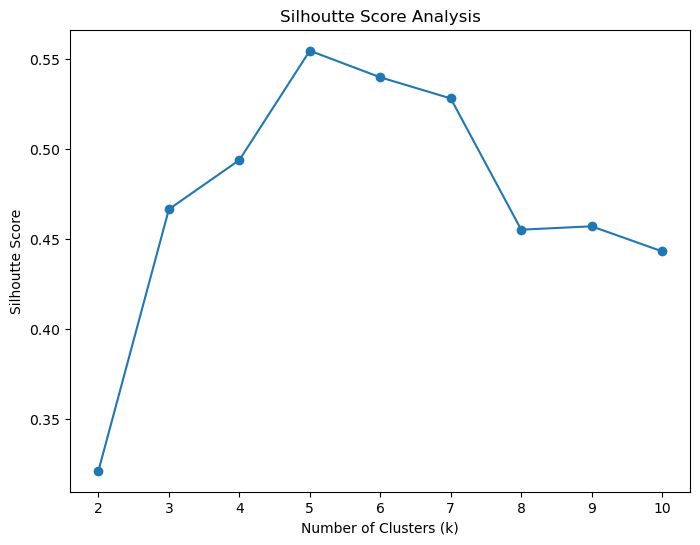

In [28]:
# Plotting Silhoutte Scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhoutte Score Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhoutte Score')
plt.show()

In [29]:
# Train the KMeans model with optimal K (K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

In [38]:
sil = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score for k=5: {sil:.2f}')

Silhouette Score for k=5: 0.55


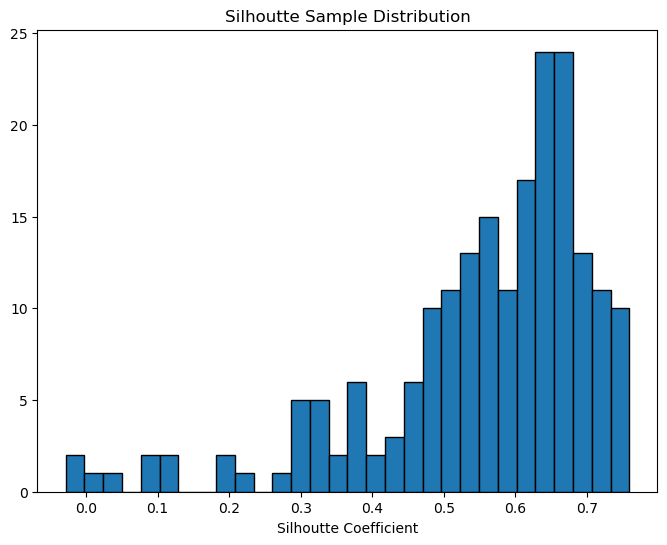

In [43]:
# Silhoutte Sample Plot
sample_sil = silhouette_samples(X_scaled, df['Cluster'])
plt.figure(figsize=(8, 6))
plt.hist(sample_sil, bins=30, edgecolor='k')
plt.xlabel('Silhoutte Coefficient')
plt.title('Silhoutte Sample Distribution')
plt.show()

Visualize Clusters (2D Plot)

<Axes: xlabel='Annual Income', ylabel='Spending Score'>

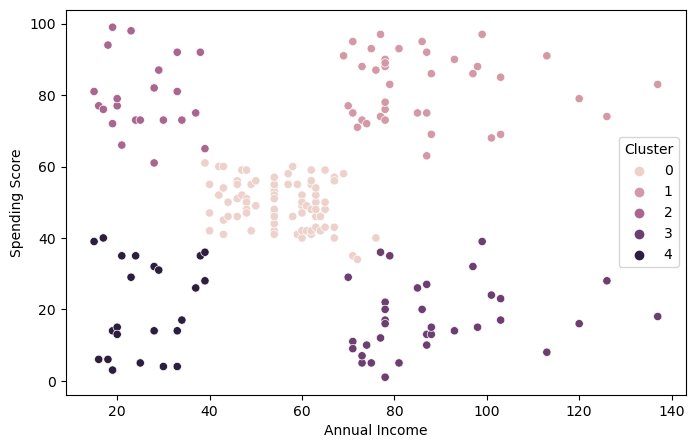

In [31]:
# Plot the clusters with centroids
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Annual Income',
    y= 'Spending Score',
    hue = 'Cluster',
    data = df
    )

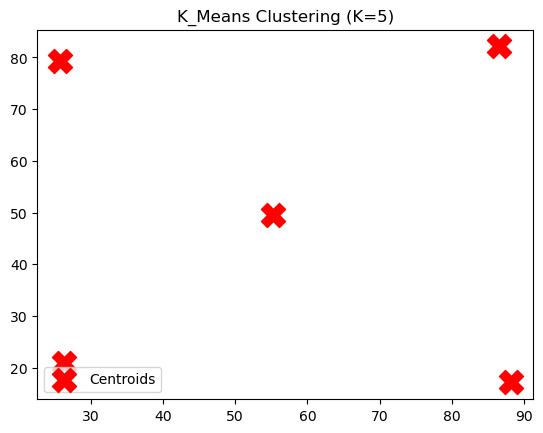

In [32]:
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
    s=300, c='red', marker='X', label='Centroids'
)
plt.title('K_Means Clustering (K=5)')
plt.legend()
plt.show()

## Try DBSCAN (Density-Based Clustering)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels
# eps --> neighborhood distance
# min_samples --> minimum points to form a cluster

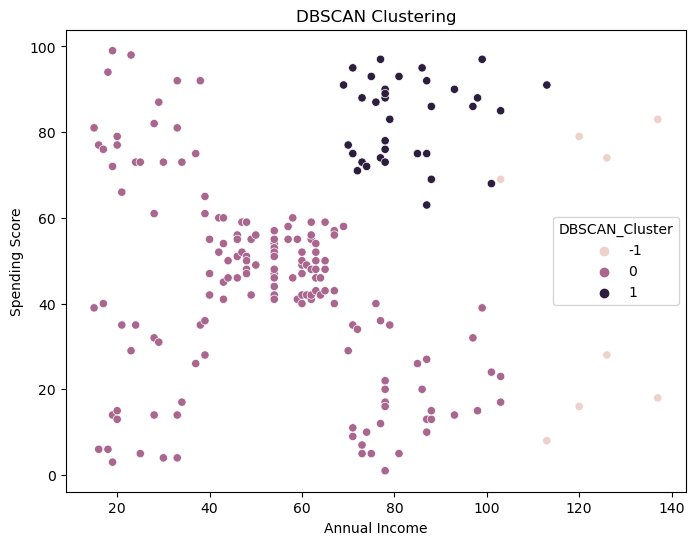

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income',
    y='Spending Score',
    hue='DBSCAN_Cluster',
    data=df
)
plt.title('DBSCAN Clustering')
plt.show()

### Analyze Average Spending per Cluster

In [46]:
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income': 'mean',
    'Spending Score': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster':'Count'})
print(cluster_summary)

         Annual Income  Spending Score  Count
Cluster                                      
0            55.296296       49.518519     81
1            86.538462       82.128205     39
2            25.727273       79.363636     22
3            88.200000       17.114286     35
4            26.304348       20.913043     23


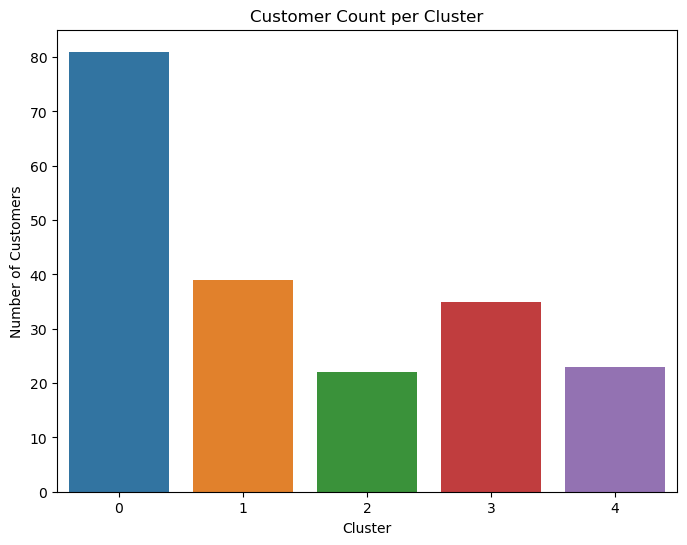

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x=cluster_summary.index.astype(str),
    y=cluster_summary['Count'],
)
plt.title('Customer Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
#lt.tight_layout()
plt.show()